## Part 1

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

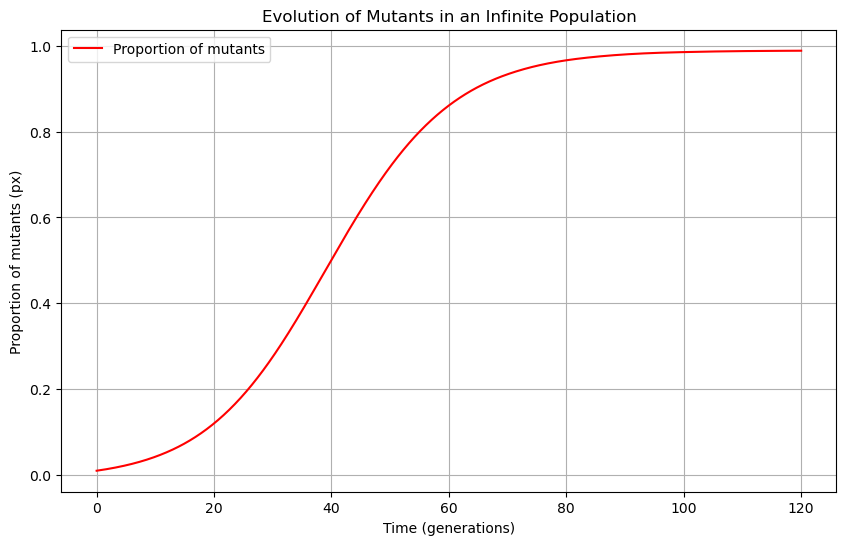

In [2]:


# Parameters
s = 0.1  # Selective advantage
n = 0.001  # Normalization probability
m = 0.001  # Mutation probability
px0 = 0.01  # Initial proportion of mutants

# Time span
t_span = (0, 120)  # From 0 to 50 generations
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Evaluate at these points for a smooth curve

# Differential equation
def dpdt(t, px, s, n, m):
    return (px * (s - n - m - n*s) + m - s*px**2) / (1 + s*px)

# Solve ODE
sol = solve_ivp(dpdt, t_span, [px0], args=(s, n, m), t_eval=t_eval, method='RK45')

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(sol.t, sol.y[0], label='Proportion of mutants', color='red')
plt.xlabel('Time (generations)')
plt.ylabel('Proportion of mutants (px)')
plt.title('Evolution of Mutants in an Infinite Population')
plt.legend()
plt.grid(True)
plt.show()


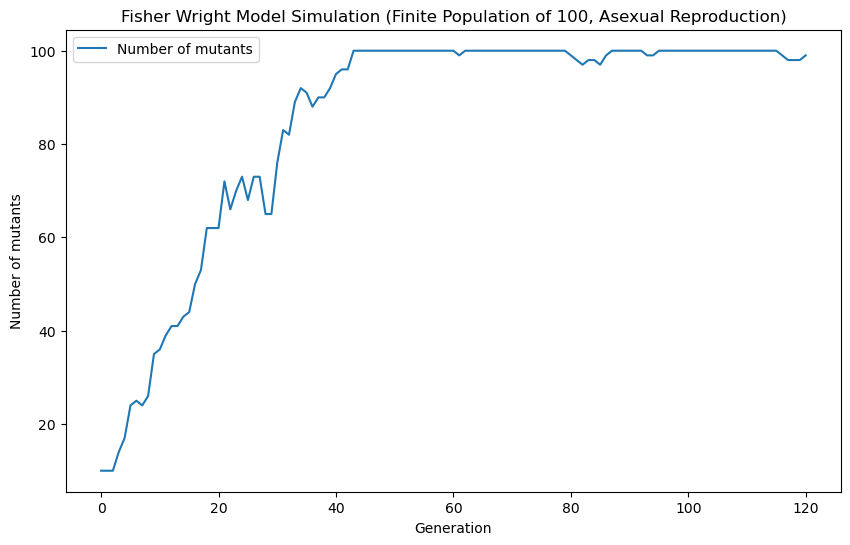

In [3]:


def simulate_fisher_wright_finite_asexual(N, x0, s, m, n, T):
  
    x = x0
    mutant_counts = [x0]
   
    for t in range(T):
        psm = ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)
        x = np.random.binomial(N, psm)
        mutant_counts.append(x)
   
    return mutant_counts

# Simulation parameters
N = 100  # Population size
x0 = 10  # Initial number of mutants
s = 0.1 # Selective advantage
m = 0.001 # Mutation rate
n = 0.001 # Normalization probability
T = 120  # Number of generations

# Run simulation
mutant_counts = simulate_fisher_wright_finite_asexual(N, x0, s, m, n, T)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mutant_counts, label='Number of mutants')

plt.xlabel('Generation')
plt.ylabel('Number of mutants')
plt.title('Fisher Wright Model Simulation (Finite Population of 100, Asexual Reproduction)')
plt.legend()
plt.show()




Finite Model follows a similar general patter to the infinite model, but each run slightly varies.

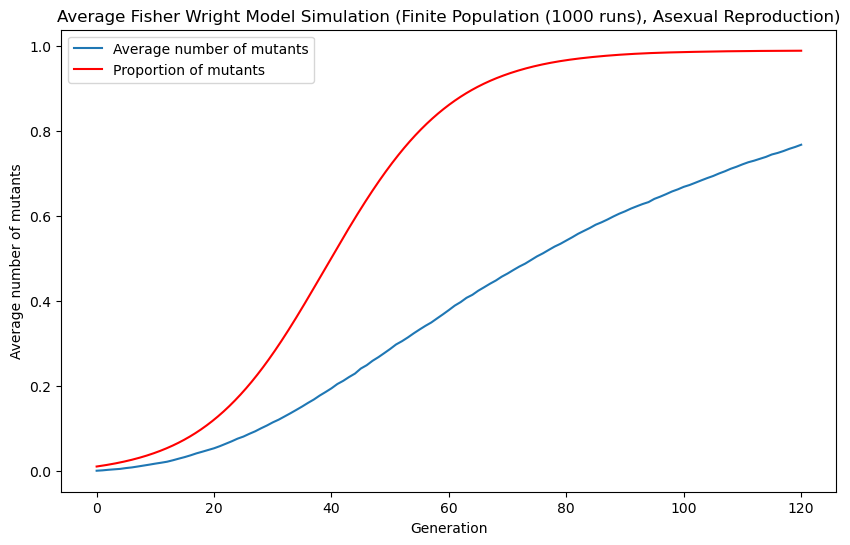

In [4]:


def simulate_fisher_wright_finite_asexual(N, x0, s, m, n, T):
   
    x = x0
    mutant_counts = [x0]
   
    for t in range(T):
        psm = ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)
        x = np.random.binomial(N, psm)
        mutant_counts.append(x)
   
    return mutant_counts

def average_fisher_wright_runs(N, x0, s, m, n, T, runs):
  
    all_runs = np.zeros((runs, T+1))
   
    for i in range(runs):
        all_runs[i] = simulate_fisher_wright_finite_asexual(N, x0, s, m, n, T)
   
    # Calculate the average across all runs for each generation
    average_mutants = np.mean(all_runs, axis=0)
   
    return average_mutants

# Parameters for simulation
N = 100
x0 = 0.01
s = 0.1
m = 0.001
n = 0.001
T = 120
runs = 1000  # Number of simulations to average

# Run simulations and average
average_mutants = average_fisher_wright_runs(N, x0, s, m, n, T, runs)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(average_mutants/N, label='Average number of mutants')
plt.plot(sol.t, sol.y[0], label='Proportion of mutants', color='red')

plt.xlabel('Generation')
plt.ylabel('Average number of mutants')
plt.title('Average Fisher Wright Model Simulation (Finite Population (1000 runs), Asexual Reproduction)')
plt.legend()
plt.show()



Averaging the finite population model many times over generates a similar graph to the infite model graph. The more runs, the smoother the line gets (like the infinite) but stays a consitent distance away

In [5]:

def fw_simulation_multiple_runs(N, x0, s, m, n, T, runs):
    
    take_over_times = []
    final_proportions = []
   
    for run in range(runs):
        x = x0
        for t in range(T):
            psm = ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)
            x = np.random.binomial(N, psm)
            px = x / N
            if px > 0.95:
                take_over_times.append(t)
                final_proportions.append(px)
                break
   
    average_take_over_time = np.mean(take_over_times) if take_over_times else None
    average_final_proportion = np.mean(final_proportions) if final_proportions else None
   
    return average_take_over_time, average_final_proportion




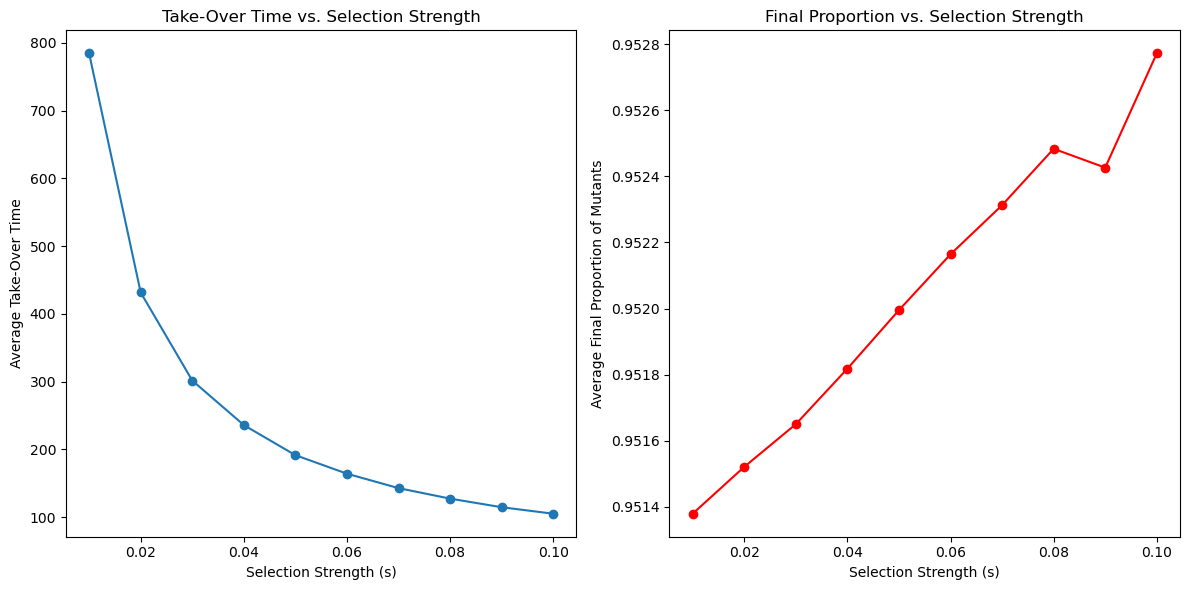

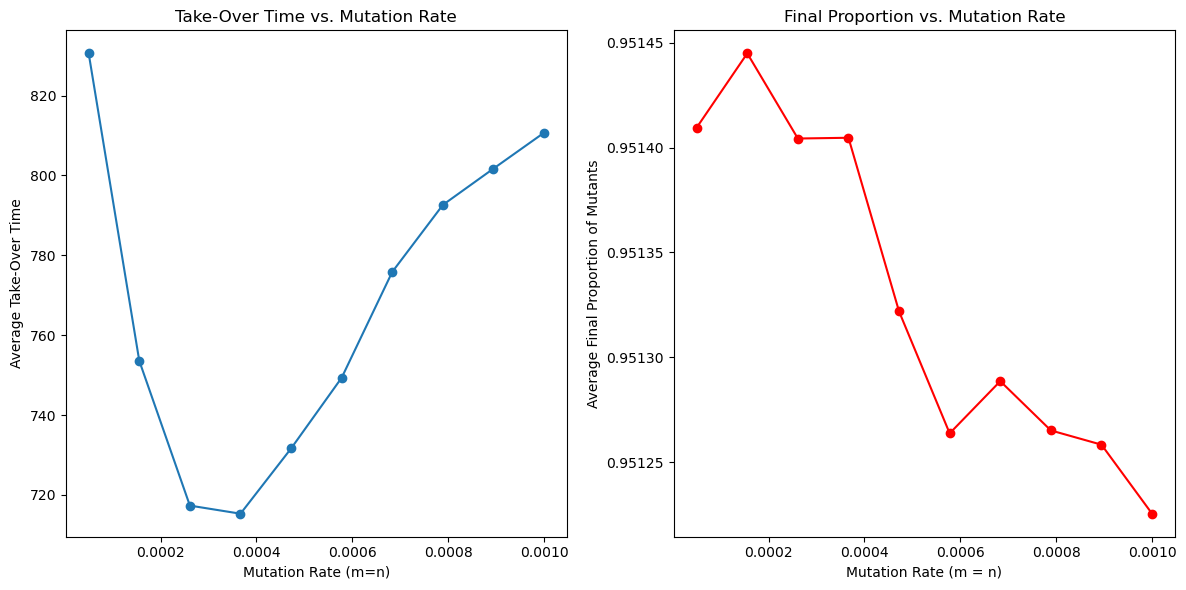

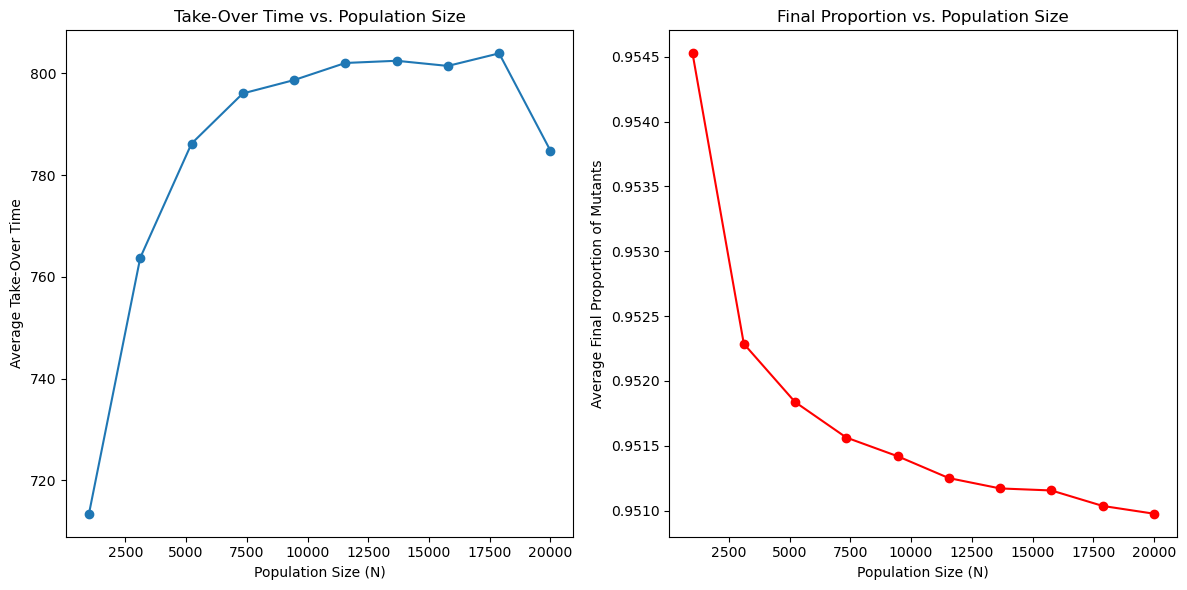

In [6]:

# Parameters
P = 10000
u = v = m = 0.0001
n = m  # Assuming n = m for simplicity
T = 1000
runs = 1000
selection_strengths = np.linspace(0.01, 0.1, 10)

take_over_times_s = []
final_proportions_s = []

for s in selection_strengths:
    avg_time, avg_px = fw_simulation_multiple_runs(P, 1, s, m, n, T, runs)
    take_over_times_s.append(avg_time)
    final_proportions_s.append(avg_px)

# Plotting take-over times
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(selection_strengths, take_over_times_s, marker='o')
plt.xlabel('Selection Strength (s)')
plt.ylabel('Average Take-Over Time')
plt.title('Take-Over Time vs. Selection Strength')

# Plotting final proportions
plt.subplot(1, 2, 2)
plt.plot(selection_strengths, final_proportions_s, marker='o', color='r')
plt.xlabel('Selection Strength (s)')
plt.ylabel('Average Final Proportion of Mutants')
plt.title('Final Proportion vs. Selection Strength')

plt.tight_layout()


# Parameters
P = 10000
s = 0.01
n = m = 0.0001  # Mutation rate
T = 1000
runs = 1000
mutation_rates = np.linspace(0.00005, 0.001, 10)

take_over_times_m = []
final_proportions_m = []

for mutation_rate in mutation_rates:
    avg_time, avg_px = fw_simulation_multiple_runs(P, 1, s, mutation_rate, mutation_rate, T, runs)
    take_over_times_m.append(avg_time)
    final_proportions_m.append(avg_px)

# Plotting take-over times
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mutation_rates, take_over_times_m, marker='o')
plt.xlabel('Mutation Rate (m=n)')
plt.ylabel('Average Take-Over Time')
plt.title('Take-Over Time vs. Mutation Rate')

# Plotting final proportions
plt.subplot(1, 2, 2)
plt.plot(mutation_rates, final_proportions_m, marker='o', color='r')
plt.xlabel('Mutation Rate (m = n)')
plt.ylabel('Average Final Proportion of Mutants')
plt.title('Final Proportion vs. Mutation Rate')

plt.tight_layout()



# Parameters
s = 0.01
u = v = 0.0001
T = 1000
runs = 1000
population_sizes = np.linspace(1000, 20000, 10)

take_over_times_N = []
final_proportions_N = []

for N in population_sizes:
    avg_time, avg_px = fw_simulation_multiple_runs(N, 1, s, u, v, T, runs)
    take_over_times_N.append(avg_time)
    final_proportions_N.append(avg_px)

# Plotting take-over times
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(population_sizes, take_over_times_N, marker='o')
plt.xlabel('Population Size (N)')
plt.ylabel('Average Take-Over Time')
plt.title('Take-Over Time vs. Population Size')

# Plotting final proportions
plt.subplot(1, 2, 2)
plt.plot(population_sizes, final_proportions_N, marker='o', color='r')
plt.xlabel('Population Size (N)')
plt.ylabel('Average Final Proportion of Mutants')
plt.title('Final Proportion vs. Population Size')

plt.tight_layout()
plt.show()






For a mutant to quickly take over a population include: 

Higher Selection Strength - A mutant with a significant fitness advantage over the rest of the population. 

Optimal Mutation Rate - Not too high to introduce many competing variants or cause the loss of beneficial mutations, and not too low to prevent the mutant from arising sufficiently. 

Sufficient Population Size - A large enough population to allow the mutant to spread quickly, but not so large that the sheer number of individuals hinders the spread.

## Part 2

Transition Matrix:  [[0.99  0.001 0.    ... 0.    0.    0.   ]
 [0.01  0.989 0.001 ... 0.    0.    0.   ]
 [0.    0.01  0.989 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.998 0.002 0.   ]
 [0.    0.    0.    ... 0.    0.998 0.002]
 [0.    0.    0.    ... 0.    0.    0.998]]
Columns sums:  [1. 1. 1. ... 1. 1. 1.]


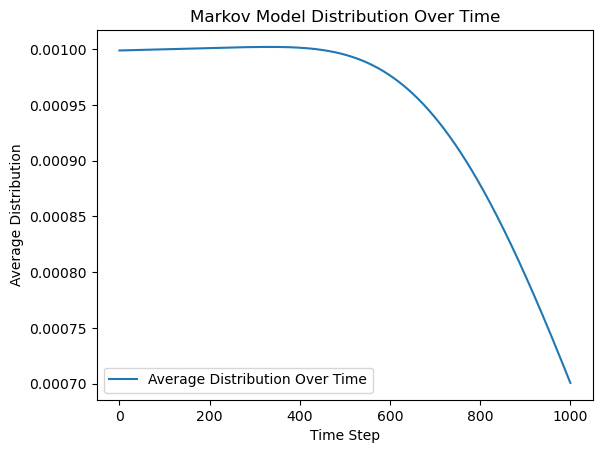

In [7]:

from scipy.stats import binom

# Parameters
N = 1000  # Population size
s = 0.01  # Selection coefficient
n = 0.001  # Mutation rate from Q to P
m = 0.001  # Mutation rate from P to Q
T = 1000  # Number of time steps

# Initialize the transition matrix W
#W = np.zeros((N+1, N+1))

def transition_matrix(N, s, n, m):
    W = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(N+1):
            if j == i - 1:
                W[i, j] = s * (N - i + 1) / N
            elif j == i:
                W[i, j] = 1 - (s + n + m)
            elif j == i + 1:
                W[i, j] = n + m * (i + 1) / N
   
    # Ensure each element is bounded between 0 and 1
    W = np.clip(W, 0, 1)
   
    # Ensure each column sums to 1
    W /= np.sum(W, axis=0)
   
    return W


W = transition_matrix(N, s, n, m)
W_rounded = np.round(W, decimals=3)
print("Transition Matrix: ",W_rounded)

# Check that all columns sum to 1
columns_sum = np.sum(W, axis=0)
print("Columns sums: ",columns_sum)

# Generate Markov distribution for each time step
# Assuming the initial state is 0 mutants
distribution = np.zeros((T+1, N+1))
distribution[0, int(N*x0)] = 1  # Initial distribution

for t in range(1, T+1):
    distribution[t] = np.dot(distribution[t-1], W)

# Calculate the average of this distribution for each time step
average_distribution = np.mean(distribution, axis=1)

# Plot the average of the distribution for each time step
plt.plot(range(T+1), average_distribution, label='Average Distribution Over Time')
plt.xlabel('Time Step')S
plt.ylabel('Average Distribution')
plt.title('Markov Model Distribution Over Time')
plt.legend()
plt.show()




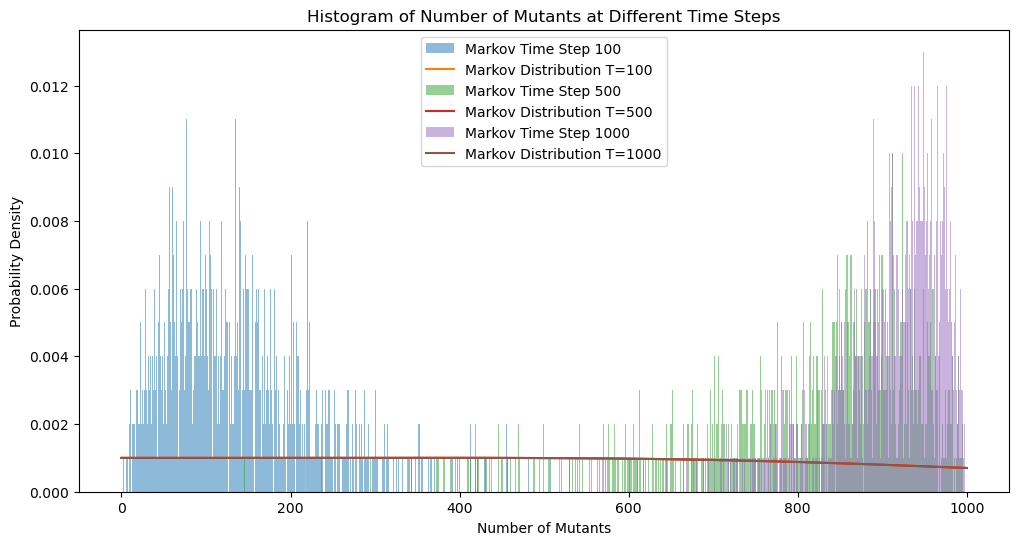

In [8]:


# Function to simulate the Fisher-Wright model multiple times and store the number of mutants at each time step
def simulate_fisher_wright(N, s, n, m, T, x0, runs):
    results = []
    for _ in range(runs):
        #simulate_fisher_wright_finite_asexual(N, x0, s, m, n, T)
        x = simulate_fisher_wright_finite_asexual(N, x0, s, n, m, T)
        results.append(x)
    return np.array(results)

# Function to plot histograms of the number of mutants for each model
def plot_histograms_fisher_wright_vs_markov(simulation_results, markov_time_steps, markov_distributions, bins):
    plt.figure(figsize=(12, 6))
    for t, distribution in zip(markov_time_steps, markov_distributions):
        plt.hist(simulation_results[:, t], bins=bins, alpha=0.5, label=f'Markov Time Step {t}', density=True)
        plt.plot(range(len(distribution)), distribution, label=f'Markov Distribution T={t}')
    plt.xlabel('Number of Mutants')
    plt.ylabel('Probability Density')
    plt.title('Histogram of Number of Mutants at Different Time Steps')
    plt.legend()
    plt.show()

# Parameters for Fisher-Wright model
N = 1000   # Population size
T = 1000   # Number of generations
s = 0.01   # Selection coefficient
n = 0.001  # Mutation rate from Q to P
m = 0.001  # Mutation rate from P to Q
x0 = 0.01  # Initial proportion of mutants
runs = 1000 # Number of runs for simulation

# Simulate Fisher-Wright model
simulation_results = simulate_fisher_wright(N, s, n, m, T, x0, runs)

# Generate Markov distribution
markov_time_steps = [100, 500, 1000]

# Plot histograms
plot_histograms_fisher_wright_vs_markov(simulation_results, markov_time_steps, [average_distribution]*len(markov_time_steps), bins=range(N+1))






## Part 3

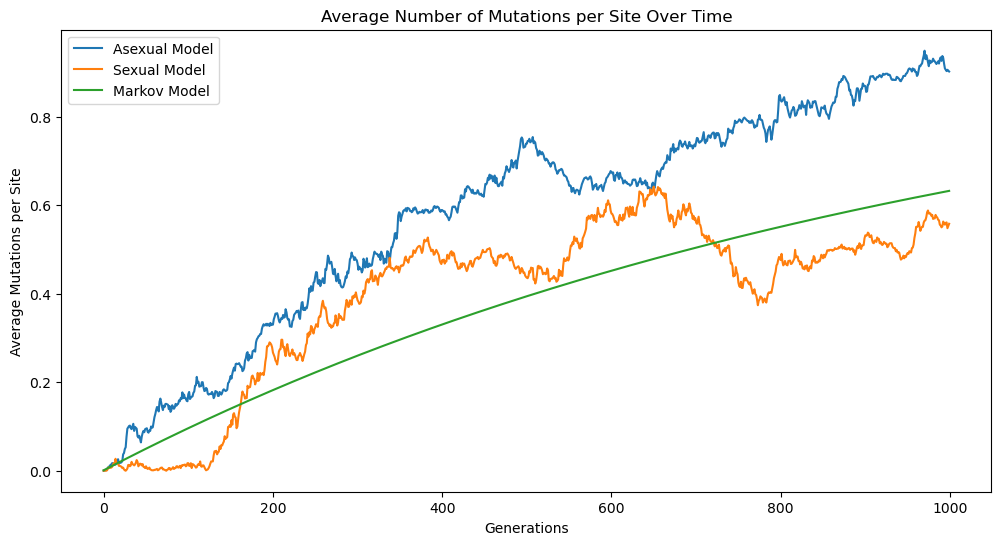

In [13]:
# Parameters
L = 10  # Length of the genome
N = 100  # Population size
s = 0.01  # Selection coefficient per beneficial mutation
mu = 0.001  # Mutation rate per gene per generation
generations = 1000  # Number of generations

# Initialize population
population = np.zeros((N, L), dtype=int)

def fitness(individual):
    return 1 + s * np.sum(individual)

def mutate(individual):
    for gene in range(L):
        if np.random.rand() < mu:
            individual[gene] = 1 - individual[gene]
    return individual

def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, L)  # Random crossover point
    return np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))

def simulate_population(reproduction_mode):
    population = np.zeros((N, L), dtype=int)  # Reset population
    avg_mutations = []
    for generation in range(generations):
        next_generation = []
        fitnesses = np.array([fitness(ind) for ind in population])
        probs = fitnesses / fitnesses.sum()
        for _ in range(N // 2 if reproduction_mode == 'sexual' else N):
            if reproduction_mode == 'sexual':
                parents = np.random.choice(N, size=2, replace=False, p=probs)
                parent1, parent2 = population[parents[0]], population[parents[1]]
                offspring1 = mutate(crossover(parent1, parent2).copy())
                offspring2 = mutate(crossover(parent2, parent1).copy())
                next_generation.extend([offspring1, offspring2])
            else:  # Asexual reproduction
                parent = population[np.random.choice(N, p=probs)]
                offspring = mutate(parent.copy())
                next_generation.append(offspring)
        population = np.array(next_generation)
        avg_mutations.append(population.mean())
    return avg_mutations

# Simulate both asexual and sexual reproduction
avg_mutations_asexual = simulate_population('asexual')
avg_mutations_sexual = simulate_population('sexual')

# Simplistic Markov model for average mutations
prob_mutation_per_site = np.zeros(L)
avg_mutations_markov = []
for generation in range(generations):
    prob_mutation_per_site = prob_mutation_per_site + mu * (1 - prob_mutation_per_site)
    avg_mutations_markov.append(prob_mutation_per_site.mean())

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(avg_mutations_asexual, label='Asexual Model')
plt.plot(avg_mutations_sexual, label='Sexual Model')
plt.plot(avg_mutations_markov, label='Markov Model')
plt.title('Average Number of Mutations per Site Over Time')
plt.xlabel('Generations')
plt.ylabel('Average Mutations per Site')
plt.legend()
plt.show()





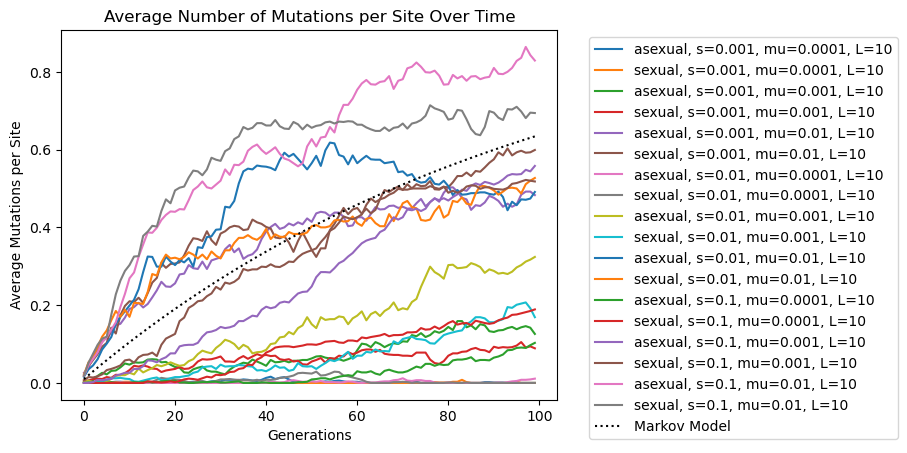

In [10]:





import numpy as np
import matplotlib.pyplot as plt

# Updated simulate_population function to accept varying parameters
def simulate_population(N, L, s, mu, generations, reproduction_mode):
    population = np.zeros((N, L), dtype=int)
    avg_mutations = []
    for generation in range(generations):
        next_generation = []
        fitnesses = np.array([1 + s * np.sum(ind) for ind in population])
        probs = fitnesses / fitnesses.sum()
        for _ in range(N // 2 if reproduction_mode == 'sexual' else N):
            if reproduction_mode == 'sexual':
                parents = np.random.choice(N, size=2, replace=False, p=probs)
                parent1, parent2 = population[parents[0]], population[parents[1]]
                offspring1 = mutate(parent1, L, mu)
                offspring2 = mutate(parent2, L, mu)
                next_generation.extend([offspring1, offspring2])
            else:  # Asexual reproduction
                parent = population[np.random.choice(N, p=probs)]
                offspring = mutate(parent, L, mu)
                next_generation.append(offspring)
        population = np.array(next_generation)
        avg_mutations.append(np.mean(population))
    return avg_mutations

# Function to mutate an individual
def mutate(individual, L, mu):
    for gene in range(L):
        if np.random.rand() < mu:
            individual[gene] = 1 - individual[gene]
    return individual

# Parameter arrays for exploration
selection_coefficients = [0.001, 0.01, 0.1]
mutation_rates = [0.0001, 0.001, 0.01]
genome_lengths = [10]

# Base parameters
N = 100
generations = 100
reproduction_modes = ['asexual', 'sexual']

# Loop over parameters and simulate
for s in selection_coefficients:
    for mu in mutation_rates:
        for L in genome_lengths:
            for mode in reproduction_modes:
                avg_mutations = simulate_population(N, L, s, mu, generations, mode)
                plt.plot(avg_mutations, label=f'{mode}, s={s}, mu={mu}, L={L}')

# Plot the Markov model for comparison (assuming constant mutation rate)
prob_mutation_per_site = np.zeros(L)
avg_mutations_markov = []
for generation in range(generations):
    prob_mutation_per_site = prob_mutation_per_site + mu * (1 - prob_mutation_per_site)
    avg_mutations_markov.append(prob_mutation_per_site.mean())
plt.plot(avg_mutations_markov, label='Markov Model', linestyle=':', color='black')

plt.title('Average Number of Mutations per Site Over Time')
plt.xlabel('Generations')
plt.ylabel('Average Mutations per Site')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()






